# Web scrapping the NBA website to follow the games live without your collegues knowing

###  Series 2 of 3

We just went through the basics of web scrapping and how to read a basic xml tree to extract the information that we want based on the attributes of different html tags. This time, I will use those skills to query a different URL of the NBA where one can obtain the result of every games that has been played or is currently play and get the result of those.  This will allow us to query the result of any NBA team, so we can use it later as a function for tracking live games or keep track of our favourite teams.

### If you want to jump straight to the application....

please click here: . However, if you are not familiar with how to do some web scrapping and html reading I strongly recommend you to follow along the series

### Let's begin then

In [2]:
import sys
sys.path.insert(0, "C:/Users/luisa/Documents/GitHub/Web-Spider---Sentiment-Analysis/venv/env/Lib/site-packages")

sys.path.insert(0, "C:/Users/RojasL/PycharmProjects/untitled3/venv/Lib/site-packages")

As usual, the first thing to do is to call the libraries that we will be using for this particular project. Here, we are importing some extra functions that we didn't use before but worry not!!, this will be explain later

In [30]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
# Some HTML and display core function for flashy displays ;)
from IPython.core.display import display, HTML, Image
# Python widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Box, VBox, Label, Layout, HBox
import ipywidgets as widgets
import datetime as dt
import pytz

Then we call the selenium driver to later scrap the info that we want to

In [4]:
#driver = webdriver.Firefox()
driver = webdriver.Chrome('C:/Users/RojasL/Downloads/chromedriver.exe')

Once the selenium driver is open, as before we pass the url that we want to be rendered there

In [25]:
url_stats = 'https://stats.nba.com/schedule/'
driver.get(url_stats)

The follwing table will be generated with whateveris the current date at themoment of running it:

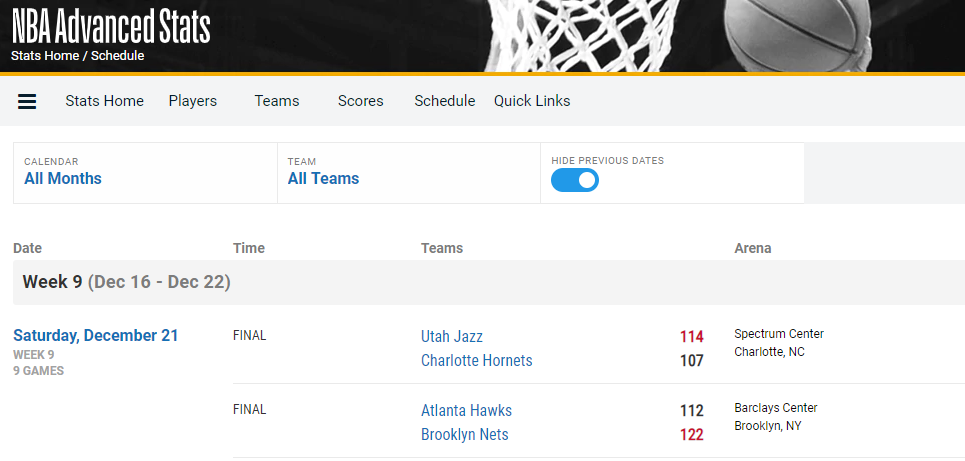

In [14]:
import os
wd = os.getcwd()
Image(wd + "\\stat_table.png")

So multiple things are happening here, we have three different buttons that we can interact with which will generate the table that is just below based on the different selections that we made. This table get refresh every day with the results of every game that has past and one can choose to view as far as the beginning of the current preseason results. One key challenge here that we have, is that switch of previous games which dictates if all the games in the past will be shown or not. And the other, is that once we click this and we want to go even farther back from what the table is currently displaying us, we find a see more button that will stop us from viewing the complete table

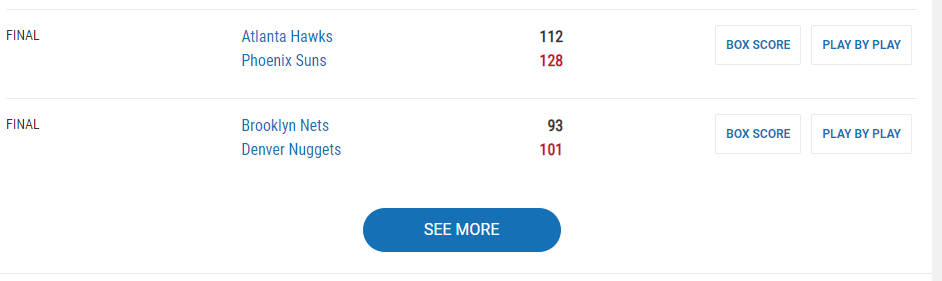

In [15]:
Image(wd + "\\see_more.png")

And this will be the focus of this part of the tutorial. Knowing how can we interact with these buttons via the selenium web driver and extract any information that may be hidden or not display completely to us. This is very useful these days where rendering websites using js functions is quite common. Knowing how to overcome this, allow us to query information from a big amount of websites out there

First we have to identify which class is the 'hide previous games' switch named with:

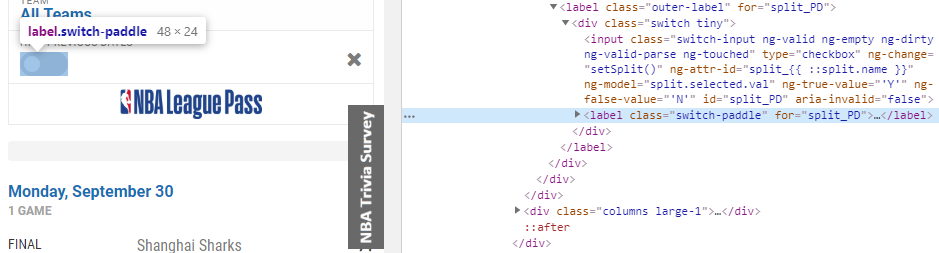

In [17]:
Image(wd + "\\hide_button.png")

As we can see here, it is a label tag with 'switch-paddle' class. Then we create a little JS script that we would aks the driver to execute based on the current html tags that are in display in the current website 


In [26]:
driver.execute_script("document.querySelector('[class=\"switch-paddle\"]').click()")

A lot of cool things are happening here. One of them is that, yes as you would have probably discovered by now!!!, we can execute javascript on whatever website is loaded in our selenium driver to interact with it. Also that by doing so, we can unlock information that before wasn't available to us in the first place

This code can be use as many times as one wants to turn on and off this swtich-paddle. Now we head ourselves into the other challenge that we have. Once we have shown all the previous games and it happens that there are more games than what the website is set to display, we will find this annoying see more button that is preventing as from conquering our quest!!

Remember the functions imported at the beggining of the tutorial. Now is when they become handy. Fortunately for us, they are very self explanatory. So in essence, what we willbe doing here is telling the driver to wait certain amount of time (WebDriverWait --> 1 second in our case) until a certain expected condition is met (EC) which in our case is that such element becomes clickable. So just as before, we identify first how the elemnt is called and then interact with it:

In [27]:
wait = WebDriverWait(driver, 1)
show_more = wait.until(EC.element_to_be_clickable((By.XPATH,"//a[@class='button' and @ng-click = 'seeMore()']")))
show_more.click()

Now as you probably have noticed, by doing this it doesn't ensure us that the driver will show us all the games to the present day. Therefore, we have to click this see more button mltiple times until we get to the day of today

In [31]:
# Setting a random old date
max_date = dt.date(1990,10,10)

while max_date < dt.datetime.now(pytz.timezone('US/Pacific')).date():     
    
    wait = WebDriverWait(driver, 1)
    show_more = wait.until(EC.element_to_be_clickable((By.XPATH,"//a[@class='button' and @ng-click = 'seeMore()']")))
    show_more.click()
    
    # Getting the dates of the current displayed games
    for i in driver.find_elements_by_xpath("//section[@class='row collapse schedule-content']"):
        date = i.get_attribute('data-game-day')
        game_date = dt.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
        max_date = max(max_date, game_date)

Hurray!! we got to the point in where we have interacted with multiple elements from the website to display information that was hidden from us before if we wouldn't have had the power to interact with JS scripts and query the xpath at the same time

Then, let's say that one would like to create a database with this information to follow how teams are doing so far and refresh it every day. So essentially we will be looking at a db with the dates when the games were played, final results and teams involved. For that, we will look for those elements in xpath as we saw in the previous tutorial and append them altogether in one single dataframe. As this is a big piece of code, I will break down a couple of new things added here just below:

In [39]:
# to query only the games until today and not the programmed ones
final_date = dt.datetime.now(pytz.timezone('US/Pacific')).date()

# Final resultant database
final_dataframe = pd.DataFrame(columns = ['game_date', 'team1', 'team2', 'status', 'team1_score', 'team2_score'])                                    
# For holding iteration results
temp_dataframe = final_dataframe.copy()
# Starting from scratch
driver.get(url_stats)

# Previous games: on
driver.execute_script("document.querySelector('[class=\"switch-paddle\"]').click()")
# Same loop as before just for completion
max_date = dt.date(1990,10,10)

while max_date < dt.datetime.now(pytz.timezone('US/Pacific')).date():     
    
    wait = WebDriverWait(driver, 1)
    show_more = wait.until(EC.element_to_be_clickable((By.XPATH,"//a[@class='button' and @ng-click = 'seeMore()']")))
    show_more.click()
    
    # Getting the dates of the current displayed games
    for i in driver.find_elements_by_xpath("//section[@class='row collapse schedule-content']"):
        date = i.get_attribute('data-game-day')
        game_date = dt.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
        max_date = max(max_date, game_date)

# Looping over each date, one date can have multiple games        
for i in driver.find_elements_by_xpath("//section[@class='row collapse schedule-content']"):
    date = i.get_attribute('data-game-day')
    game_date = dt.date(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    # Apply the compilation only to past games
    if final_date >= game_date:
        # Base on the current date position, search for:
        game_location = ".//tr[contains(@class, 'schedule-game__team')]"
        '''NBA league teams are held in an 'a' tag non-NBA teams in a 'span' tag. This 
        applies for preseason games. Or conditional applied here'''
        teams = format("|").join([game_location + x for x in ['//a',  '//span']])
        # In any of the two cases we need the score of the interested team
        results = game_location + '/td[contains(@class, "team-score")]'
        # Looping over the different teams that are on a same date
        for j, v in enumerate(i.find_elements_by_xpath(teams)):
            team_score= i.find_elements_by_xpath(results)[j].text
            team = v.text
            # preseason games flag
            pre_season = "span[@class = 'schedule-game__season']"
            # game status flag. has the game concluded?
            final = "span[contains(@ng-if, '::game.stt')]"
            # If game is currently live
            time = "span[contains(@class, 'hide-for-pre-game')]"
            # Find the time and game status in the same branch where of the current interation team 
            ancestor = ".//ancestor::div[@class = 'row schedule-game__content']//"
            both = format("|").join(ancestor + x for x in [pre_season, final])
            # For live games
            current_time = v.find_elements_by_xpath(ancestor + time)[0].text
            
            try:
                status = format(" - ").join([x.text for x in v.find_elements_by_xpath(both)])
                final_status = status + current_time   
                # repeater for dates and status on every team                    
                switch = j % 2
                temp_dataframe.loc[0, ['game_date', 'status']] = [date, final_status]                        
                temp_dataframe.loc[0, ['team{}'.format(switch + 1), 'team{}_score'.format(switch + 1)]] = [team, int(team_score)]
                if switch == 1:
                    # Appending data
                    final_dataframe = pd.concat([final_dataframe, temp_dataframe], axis = 0)                             

            except:
                pass
        

In [42]:
final_dataframe.to_csv(wd + 'games_data.csv')